# Pixelwise operations

## Exercises

In [133]:
import numpy as np
import cv2
import sklearn
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

### Exercise 1

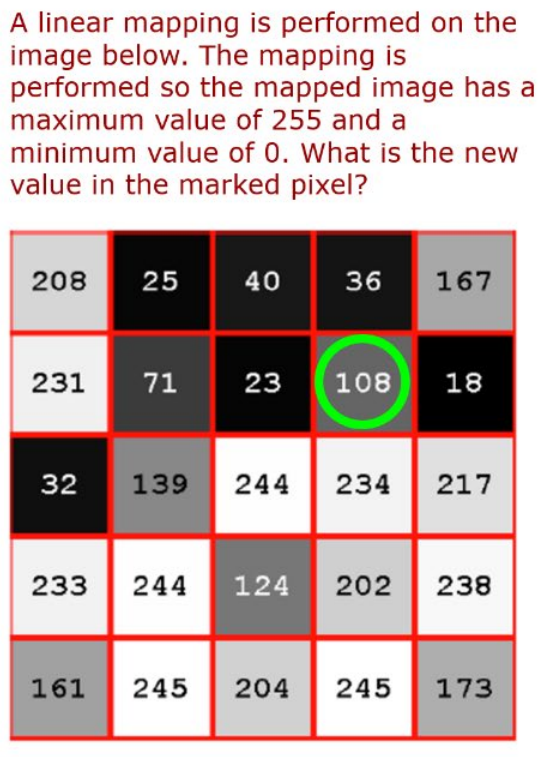

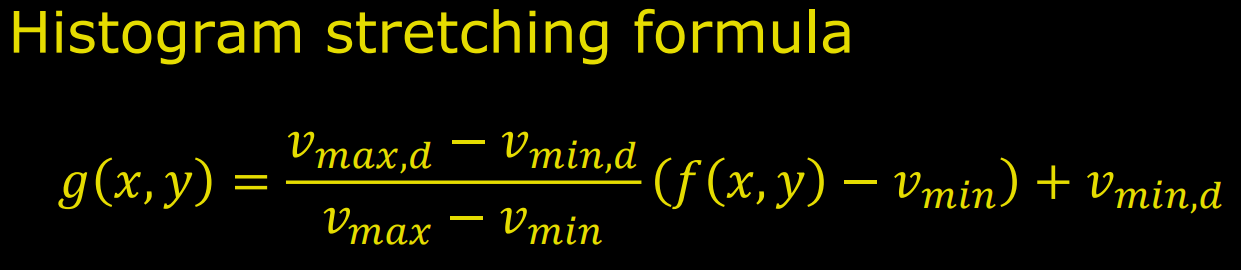

In [5]:
## Histogram stretching
v_maxd = 255
v_mind = 0
v_max = 245
v_min = 18

(v_maxd - v_mind) / (v_max-v_min) * (108 - v_min)

101.1013215859031

### Exercise 2

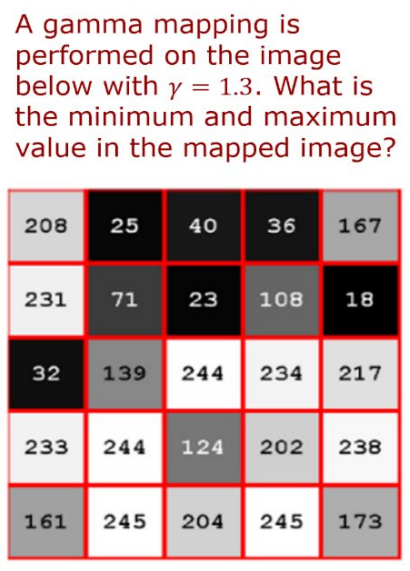

In [28]:
## Gamma mapping
## Map pixels to [0,1]
def g_01(f):
    return (1/255)*f
   
def g_255(f):
    return 255*f

In [29]:
gamma = 1.3
lower = g_255(g_01(18)**gamma)
upper = g_255(g_01(245)**gamma)
print('After gamma mapping: ['+str(round(lower,1))+','+str(round(upper,1))+']')

After gamma mapping: [8.1,242.1]


### Explorative data analysis

**Exercise 1:** Start by reading the image and inspect the histogram. Is it a bimodal histogram (has two peaks or two highest main points)? Do you think it will be possible to segment it so only the bones are visible?

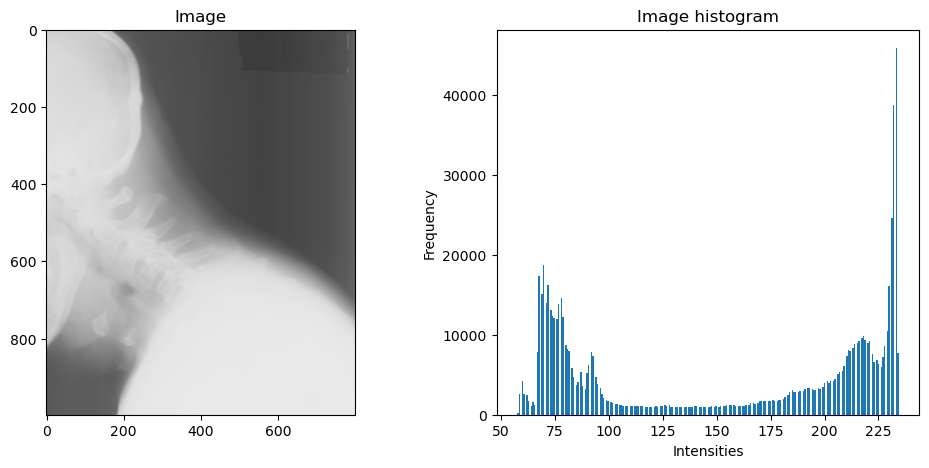

In [161]:
# Read in image
in_dir = "data/"
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)

nbins = 256
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Image')

ax[1].hist(im_org.ravel(), bins=nbins)
ax[1].set_title('Image histogram')
ax[1].set_xlabel('Intensities')
ax[1].set_ylabel('Frequency')
plt.show()

**Exercise 2:** Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [36]:
print('Max intensity', max(h[1]))
print('Min intensity', min(h[1]))

Max intensity 235.0
Min intensity 57.0


**Exercise 3:** Conversion from unsigned byte to float image

In [41]:
im_float = img_as_float(im_org)

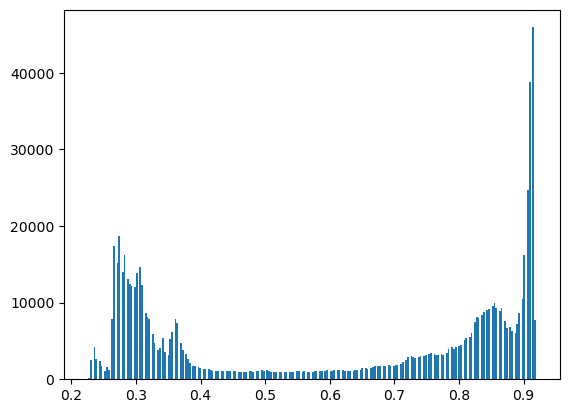

In [45]:
h = plt.hist(im_float.ravel(), bins=256)

In [46]:
print('Max intensity', max(h[1]))
print('Min intensity', min(h[1]))

Max intensity 0.9215686274509803
Min intensity 0.22352941176470587


**Exercise 4:** Conversion from float image to unsigned byte image

In [44]:
im_ubyte = img_as_ubyte(im_float)

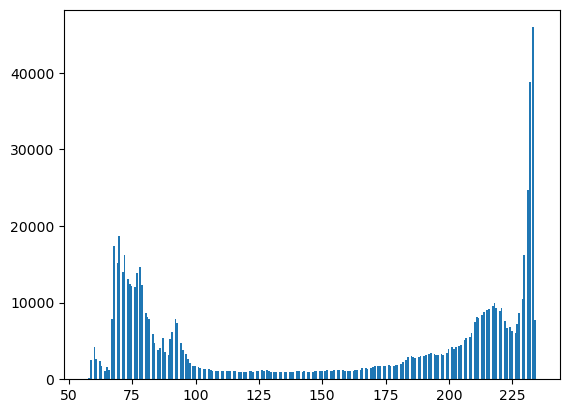

In [47]:
h = plt.hist(im_ubyte.ravel(), bins=256)

In [48]:
print('Max intensity', max(h[1]))
print('Min intensity', min(h[1]))

Max intensity 235.0
Min intensity 57.0


### Histogram stretching

**Exercise 5:** Implement a Python function called histogram_stretch.
Show the image before and after the histogram stretching. What changes do you notice in the image? Are the important structures more visible

In [71]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
    
    for i in range(0, im_float.shape[0]):
        for j in range(0,im_float.shape[1]):
            val = img_float[i][j]
            img_float[i][j] = (max_desired - min_desired) / (max_val-min_val) * (val - min_val)
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_float)

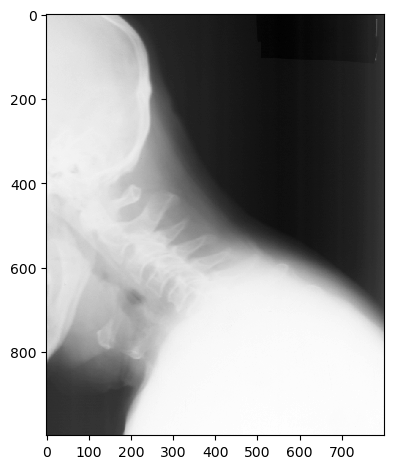

In [162]:
# Read in image
pic = histogram_stretch(im_org)
io.imshow(pic)
io.show()

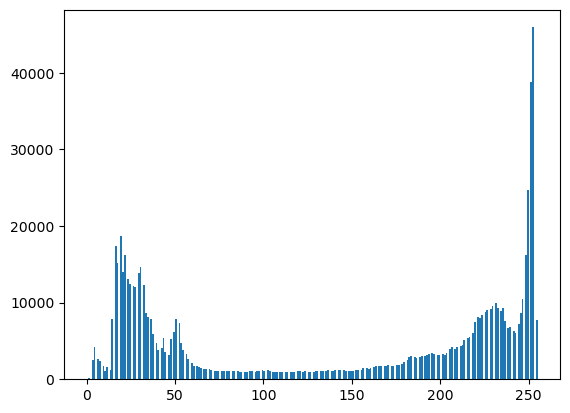

In [78]:
h = plt.hist(pic.ravel(), bins=255)

In [79]:
print('Max intensity', max(h[1]))
print('Min intensity', min(h[1]))

Max intensity 255.0
Min intensity 0.0


### Non-linear pixel value mapping

In [187]:
def gamma_map(img, gamma):
    img_float = img_as_float(img)
    for i in range(0, im_float.shape[0]):
        for j in range(0,im_float.shape[1]):
            val = img_float[i][j]
            img_float[i][j] = (val**gamma)
    return img_as_ubyte(img_float)

''' Alternative
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)
'''

' Alternative\n    img_float = img_as_float(img_in)\n    img_out = np.power(img_float, gamma)\n    return img_as_ubyte(img_out)\n'

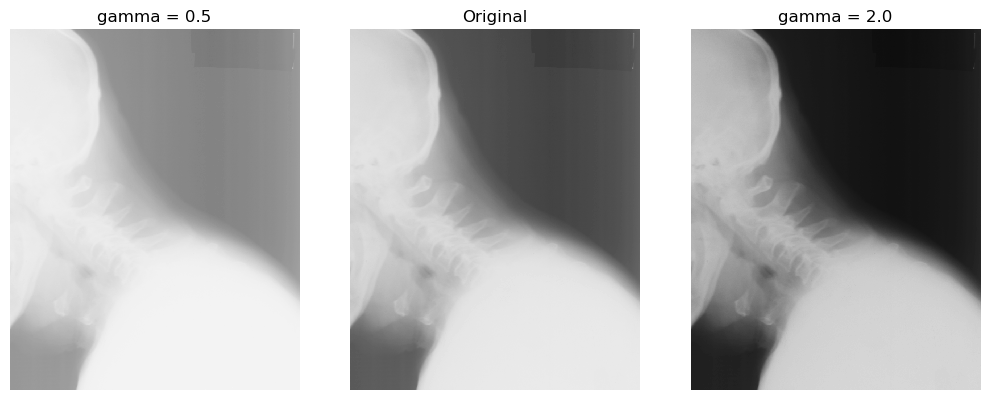

In [96]:
# create figure 
fig = plt.figure(figsize=(10, 7)) 

# setting values to rows and column variables 
rows = 1
columns = 3

# reading images 
Image1 = gamma_map(im_org, 0.5)
Image2 = gamma_map(im_org, 1)
Image3 = gamma_map(im_org, 2.0)

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 

# showing image 
io.imshow(Image1)
plt.axis('off') 
plt.title("gamma = 0.5") 

# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 

# showing image 
io.imshow(Image2) 
plt.axis('off') 
plt.title("Original") 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 

# showing image 
io.imshow(Image3) 
plt.axis('off') 
plt.title("gamma = 2.0") 

io.show()


### Image segmentation by thresholding

**Exercise 9:** Implement a function, threshold_image

In [123]:
def threshold_image(img, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    pic = img.copy()
    mask = img > thres
    pic[mask] = 0
    pic[mask == False] = 255
    
    return img_as_ubyte(pic)
    


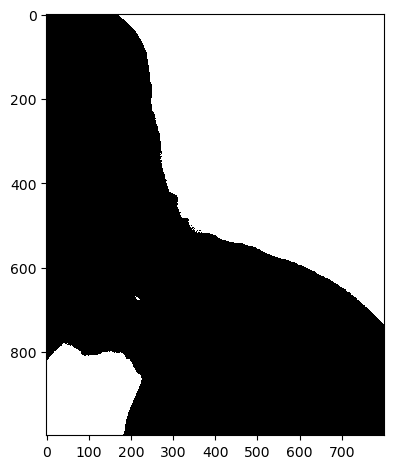

In [132]:
io.imshow(threshold_image(im_org,150))
io.show()

### Automatic thresholds using Otsu's method

**Exercise 11:** Read the documentation of Otsu's method and use it to compute and apply a threshold to the vertebra image.

In [137]:
piccy = im_org.copy()
thresh = threshold_otsu(image=piccy)
binary = piccy <= thresh

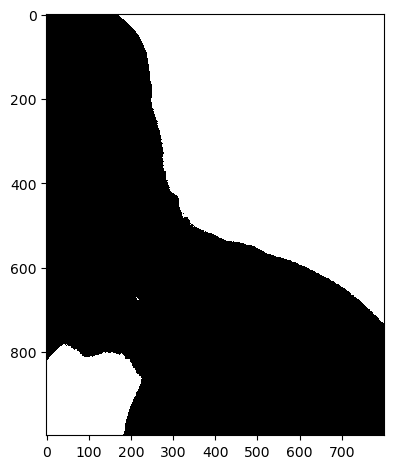

In [140]:
io.imshow(binary)
io.show()

**Exercicse 12:** Use your camera to take some pictures of yourself or a friend. Try to take a picture on a dark background. Convert the image to grayscale and try to find a threshold that creates a silhouette image (an image where the head is all white and the background black).

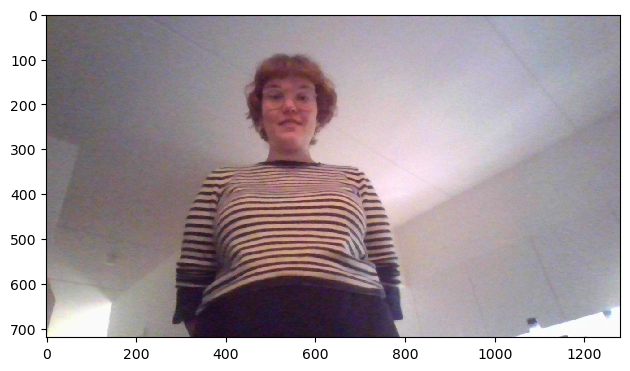

In [150]:
im_line = io.imread(r"C:\Users\Naja-\Pictures\Camera Roll\WIN_20231109_20_49_34_Pro.jpg")
io.imshow(im_line)
io.show()

In [155]:
piccy = im_line.copy()
piccy = color.rgb2gray(piccy)
thresh = threshold_otsu(image=piccy)
binary = piccy <= thresh

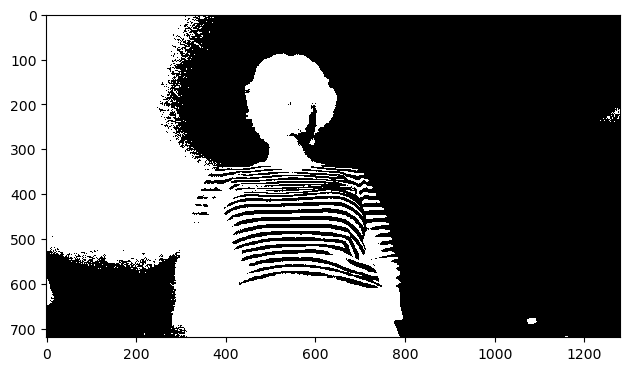

In [157]:
io.imshow(binary)
io.show()

### Color thresholding in the RGB color space

**Exercise 13:** Create a function detect_dtu_signs that takes as input a color image and returns an image, where the blue sign is identified by foreground pixels.

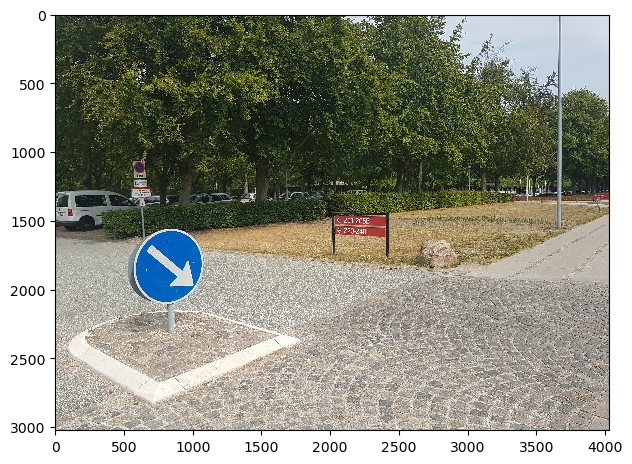

In [165]:
# Read in image
in_dir = "data/"
im_name = "DTUSigns2.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
io.show()

In [166]:
def detect_dtu_signs(img, color):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    
    if color == 'blue':
        sign = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    elif color == 'red':
        sign = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)

    return img_as_ubyte(sign)

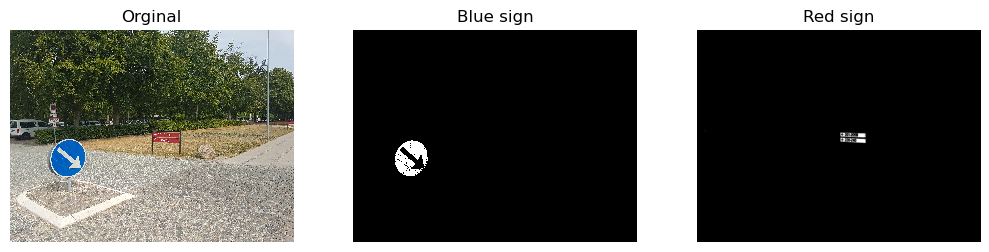

In [183]:
# create figure 
fig = plt.figure(figsize=(10, 7)) 

# setting values to rows and column variables 
rows, columns = 1, 3

# reading images 
Image1 = im_org
Image2 = detect_dtu_signs(im_org, 'blue')
Image3 = detect_dtu_signs(im_org, 'red')

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 

# showing image 
io.imshow(Image1)
plt.axis('off') 
plt.title('Orginal') 

# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 

# showing image 
io.imshow(Image2) 
plt.axis('off') 
plt.title('Blue sign') 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 

# showing image 
plt.imshow(Image3, cmap = 'gray') 
plt.axis('off')
plt.title('Red sign') 

plt.show()


### Color thresholding in the HSV color space

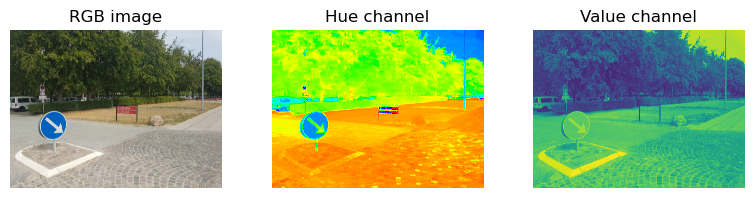

In [185]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

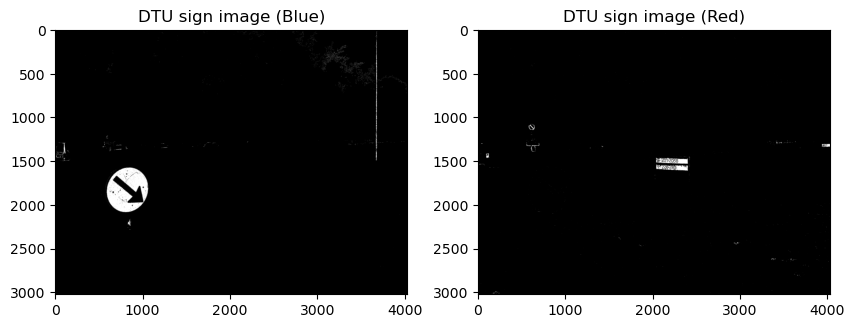

In [186]:
%matplotlib inline 

segm_blue = (hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img  > 0.9)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()